## Webscraping - Flipkart

### Install requests and beautiful soup library

In [1]:
%pip install requests bs4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Restart and run all cells

In [2]:
from warnings import filterwarnings
filterwarnings('ignore') 

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
url = "https://www.opindia.com/latest-news/?nocache"
data = requests.get(url)
data

<Response [200]>

### If respnsonse is 200 then it is ok

<!DOCTYPE html >

<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<title>Today's Latest English News Reports from India | Archives of OpIndia</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.opindia.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<link href="https://www.opindia.com/latest-news/?nocache" rel="canonical"/><link href="https://www.opindia.com/latest-news/page/2/?nocache" rel="next"/><link href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png" rel="icon" type="image/png"/>
<meta content="Latest Breaking News and Opinions from OpIndia.com. List of all news reports and opinions published by OpIndia in a chronological order." name="description"/>
<meta content="en_GB" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="Today's Latest English News Reports from India | Arc
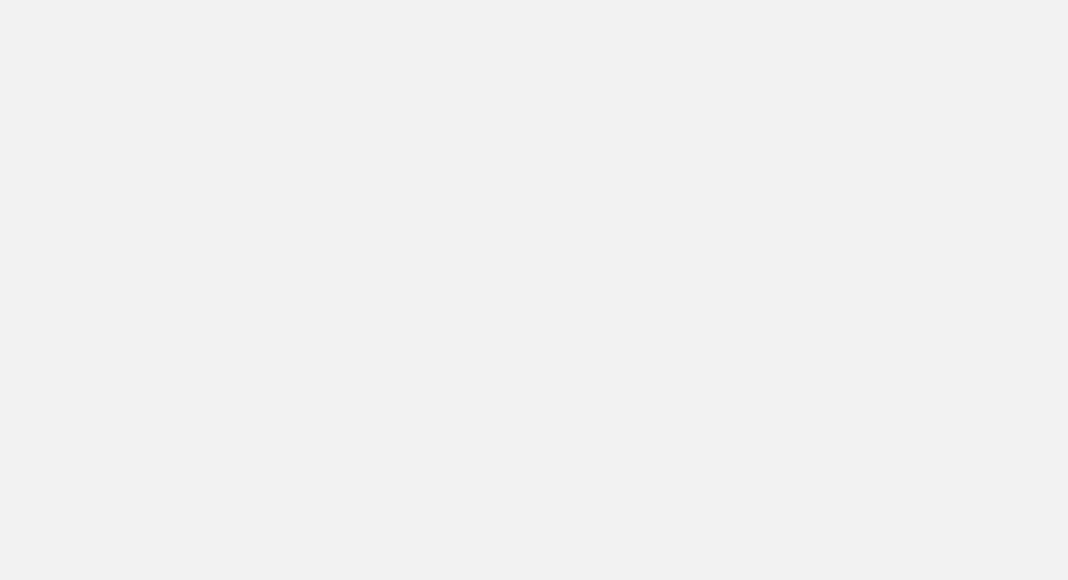

In [5]:
bs = BeautifulSoup(data.content)
bs

In [6]:
headings = bs.find_all('h3', class_="entry-title td-module-title")
headings

[<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/10/uk-metropolitan-police-defends-jihad-slogans-pro-hamas-rally-london/" rel="bookmark" title="UK: Metropolitan Police defends open calls for Jihad in Central London, says it was said in a different context">UK: Metropolitan Police defends open calls for Jihad in Central London, says it was said in a different context</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/10/tmc-maintains-distance-from-cash-for-query-allegations-against-party-mp-mahua-moitra/" rel="bookmark" title="‘No comments, have nothing to say’: Trinamool Congress maintains distance from ‘cash for query’ allegations against party MP Mahua Moitra">‘No comments, have nothing to say’: Trinamool Congress maintains distance from ‘cash for query’ allegations against party MP Mahua Moitra</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/10/tamil-nadu-police-arrest-bjp-le

### Getting the urls for specific news articles

In [7]:
headings[0].find('a').get('href')

'https://www.opindia.com/2023/10/uk-metropolitan-police-defends-jihad-slogans-pro-hamas-rally-london/'

### Create a function to fetch all new article urls

In [8]:
def get_news_urls(url):
    data = requests.get(url)
    bs = BeautifulSoup(data.content)
    headings = bs.find_all('h3',class_="entry-title td-module-title")
    links = []
    for i in headings:
        s = i.find('a').get('href')
        links.append(s)
    return links

In [9]:
url

'https://www.opindia.com/latest-news/?nocache'

In [10]:
links = get_news_urls(url)

In [11]:
links

['https://www.opindia.com/2023/10/uk-metropolitan-police-defends-jihad-slogans-pro-hamas-rally-london/',
 'https://www.opindia.com/2023/10/tmc-maintains-distance-from-cash-for-query-allegations-against-party-mp-mahua-moitra/',
 'https://www.opindia.com/2023/10/tamil-nadu-police-arrest-bjp-leader-co-convenor-of-en-mann-en-makkal-yatra-amar-prasad-reddy/',
 'https://www.opindia.com/2023/10/samajwadi-party-leader-sumaiya-rana-justifies-hamas-attacks-on-israel/',
 'https://www.opindia.com/2023/10/kerala-garment-company-to-stop-supplying-uniforms-to-israel-police/',
 'https://www.opindia.com/2023/10/amid-india-canada-standoff-india-gives-a-strong-messahe-to-west-that-we-are-no-more-a-pushover-nation/',
 'https://www.opindia.com/2023/10/theory-of-basic-structure-impact-on-njac-collegium/',
 'https://www.opindia.com/2023/10/promotion-of-tribal-cultural-heritage-decolonisation-nation-building-modi-govt-steps/',
 'https://www.opindia.com/2023/10/lessons-hamas-attack-israel-fake-genocide-of-musl

In [12]:
len(links)

104

### For url fetch the news headings

In [13]:
links[0]

'https://www.opindia.com/2023/10/uk-metropolitan-police-defends-jihad-slogans-pro-hamas-rally-london/'

In [14]:
data2 = requests.get(links[0])
data2

<Response [200]>

In [15]:
bs2 = BeautifulSoup(data2.content)

In [16]:
h = bs2.find('h1', class_="tdb-title-text").text
h

'UK: Metropolitan Police defends open calls for Jihad in Central London, says it was said in a different context'

In [17]:
t = bs2.find('time', class_="entry-date updated td-module-date").text
t

'22 October, 2023 '

In [18]:
content = bs2.find_all('p')
content

[<p>It must be mentioned that while Jihad means 'struggle' or 'fight' in Arabic, it implies spreading Islam through violent conquest in the religious context.</p>,
 <p>Amidst the ongoing war between Hamas and the State of Israel, the Metropolitan Police in the United Kingdom <a href="https://www.telegraph.co.uk/news/2023/10/21/anger-police-handling-london-protest-jihad-chants/" rel="noreferrer noopener" target="_blank">downplayed </a>open calls for jihad raised by Hamas supporters in Central London.</p>,
 <p>An X (formerly Twitter) user shared a video wherein members of a radical Islamist <a href="https://www.counterextremism.com/threat/hizb-ut-tahrir" rel="noreferrer noopener" target="_blank">outfit </a>named ‘Hizb ut-Tahrir’ were seen proclaiming ‘jihad’ against the State of Israel.</p>,
 <p>“What is the solution to liberate people from the concentration camp called Palestine?” an Islamist was heard saying in the viral video. The mob of Hamas supporters cheered in unison, “Jihad, Jih

In [19]:
content[0].text

"It must be mentioned that while Jihad means 'struggle' or 'fight' in Arabic, it implies spreading Islam through violent conquest in the religious context."

In [20]:
news = ""
for i in content:
    news = news + i.text

In [21]:
print(news)

It must be mentioned that while Jihad means 'struggle' or 'fight' in Arabic, it implies spreading Islam through violent conquest in the religious context.Amidst the ongoing war between Hamas and the State of Israel, the Metropolitan Police in the United Kingdom downplayed open calls for jihad raised by Hamas supporters in Central London.An X (formerly Twitter) user shared a video wherein members of a radical Islamist outfit named ‘Hizb ut-Tahrir’ were seen proclaiming ‘jihad’ against the State of Israel.“What is the solution to liberate people from the concentration camp called Palestine?” an Islamist was heard saying in the viral video. The mob of Hamas supporters cheered in unison, “Jihad, Jihad, Jihad.”"What is the solution to liberate people from the concentration camp called Palestine?""Jihad! Jihad! Jihad!"From the Hizb ut Tahrir demonstration pic.twitter.com/Ba5CfkiOsyInstead of taking cognisance of the matter, the UK’s Metropolitan Police came out in defence of the Islamists an

In [22]:
def get_news_details(url):
    data2 = requests.get(url)
    bs2 = BeautifulSoup(data2.content)
    h = bs2.find('h1', class_="tdb-title-text").text
    t = bs2.find('time', class_="entry-date updated td-module-date").text
    cont = bs2.find_all('p')
    news = ""
    for i in cont:
        news = news + i.text
    return h, t, news

In [23]:
links[0]

'https://www.opindia.com/2023/10/uk-metropolitan-police-defends-jihad-slogans-pro-hamas-rally-london/'

In [24]:
h, t, news = get_news_details(links[0])

In [25]:
h

'UK: Metropolitan Police defends open calls for Jihad in Central London, says it was said in a different context'

In [26]:
t

'22 October, 2023 '

In [27]:
news

'It must be mentioned that while Jihad means \'struggle\' or \'fight\' in Arabic, it implies spreading Islam through violent conquest in the religious context.Amidst the ongoing war between Hamas and the State of Israel, the Metropolitan Police in the United Kingdom downplayed open calls for jihad raised by Hamas supporters in Central London.An X (formerly Twitter) user shared a video wherein members of a radical Islamist outfit named ‘Hizb ut-Tahrir’ were seen proclaiming ‘jihad’ against the State of Israel.“What is the solution to liberate people from the concentration camp called Palestine?” an Islamist was heard saying in the viral video. The mob of Hamas supporters cheered in unison, “Jihad, Jihad, Jihad.”"What is the solution to liberate people from the concentration camp called Palestine?""Jihad! Jihad! Jihad!"From the Hizb ut Tahrir demonstration pic.twitter.com/Ba5CfkiOsyInstead of taking cognisance of the matter, the UK’s Metropolitan Police came out in defence of the Islamis

In [28]:
import pandas as pd
def get_news_dataframe(url):
    # Get news links
    links = get_news_urls(url)
    date = []
    title = []
    article = []
    # Get News Details
    for i in links:
        h, t, news = get_news_details(i)
        title.append(h)
        date.append(t)
        article.append(news)
    # Create a dictionary
    dct = {'Date':date,
           'Heading':title,
           'News':article,
           'url':links}
    # Create a dataframe
    df = pd.DataFrame(dct)
    return df

In [29]:
url

'https://www.opindia.com/latest-news/?nocache'

In [30]:
df = get_news_dataframe(url)
df

,Date,Heading,News,url
0,"22 October, 2023",UK: Metropolitan Police defends open calls for...,It must be mentioned that while Jihad means 's...,https://www.opindia.com/2023/10/uk-metropolita...
1,"21 October, 2023","‘No comments, have nothing to say’: Trinamool ...","""No comments on this particular issue. We have...",https://www.opindia.com/2023/10/tmc-maintains-...
2,"21 October, 2023",Tamil Nadu: BJP leader and co-convenor of Anna...,"Following his arrest, BJP leader Kapil Mishra ...",https://www.opindia.com/2023/10/tamil-nadu-pol...
3,"21 October, 2023","‘Hamas is not a terror outfit, they are fighti...","While speaking to News18, Rana claimed that Ha...",https://www.opindia.com/2023/10/samajwadi-part...
4,"21 October, 2023",Kerala: Garment company in Kannur says it will...,The Maryan Apparel Pvt Limited's Thomas Olicka...,https://www.opindia.com/2023/10/kerala-garment...
...,...,...,...,...
99,"20 October, 2023",Gujarat: Feroz converts Hindu woman to Islam b...,A video circulating on social platform X shows...,https://www.opindia.com/2023/10/gujarat-feroz-...
100,"20 October, 2023","Amid the India-Canada standoff, India has, und...","Besides India's stern approach towards Canada,...",https://www.opindia.com/2023/10/amid-india-can...
101,"20 October, 2023",India rejects Canada’s accusations of violatin...,"""We reject any attempt to portray the Implemen...",https://www.opindia.com/2023/10/india-rejects-...
102,"20 October, 2023",FIR filed against former cricketer Mohd Azharu...,The accused have been booked with criminal bre...,https://www.opindia.com/2023/10/fir-against-mo...


### Save this to csv file

In [31]:
df.to_csv('OpindiaNews.csv')